In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import patsy
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('All_Player_List.csv')

In [3]:
df.sort_values(by='Market Value').head(20)

Player  Overall Score  Potential Score  Market Value  \
7921      Jean-François Gillet             68               68          1000   
12706              Leao Butrón             64               64          1000   
13582   Hussain Omar Sulaimani             63               63          1000   
3293                 Cifuentes             73               73          1000   
17278            Kevin Ellison             58               58          1000   
9103           Robinson Zapata             67               67          1000   
15427            Dannie Bulman             61               61          1000   
9097          Mauricio Caranta             67               67          1000   
6789             Lee Dong Gook             69               69          1000   
4079        Cristian Lucchetti             72               72          1000   
710                     Hilton             79               79          1000   
14780  Luis Fernando Fernández             61               61          1000   
16769           Michael Gurski             59               59          1000   
222           Gianluigi Buffon             83               83          1000   
18681                Zhou Ting             54               54          1000   
19393              Simon Royce             48               48          1000   
19033               Gary Maley             52               52          8000   
17746   Kyriakos Stamatopoulos             57               57         10000   
17220                  Wu Qing             58               58         15000   
16763        Fahad Al Shammari             59               59         15000   

       Weekly Salary  Height  Weight  Age Preferred Foot  Ball Skills  \
7921            2900     181      78   41           Left         18.0   
12706           1700     184      82   43          Right         15.0   
13582           4500     173      70   43           Left         63.5   
3293            4000     189      80   41          Right         22.5   
17278           1500     180      76   41           Left         62.5   
9103            1500     184      85   41          Right         18.5   
15427           1500     175      75   41          Right         60.0   
9097            2500     184      80   42          Right         12.0   
6789            4500     185      80   41          Right         60.0   
4079            4500     182      74   42          Right         29.5   
710            23000     180      78   42          Right         69.0   
14780           1500     187      82   42          Right         18.5   
16769           1500     189      89   41          Right         12.0   
222            60000     192      92   42          Right         27.0   
18681           1500     182      73   41          Right         57.0   
19393           1500     188      86   49          Right         18.5   
19033           1500     188      90   38          Right         15.5   
17746           1500     188      80   41           Left         18.0   
17220           1500     170      70   39           Left         63.0   
16763           1600     181      75   39          Right         15.5   

         Defence     Mental    Passing   Physical  Shooting  Goalkeeping  
7921   16.333333  37.333333  26.666667  50.285714    20.750         68.8  
12706  20.000000  33.500000  22.333333  40.285714    17.000         62.6  
13582  63.666667  69.833333  68.333333  60.571429    59.125         13.0  
3293   15.000000  37.333333  21.000000  47.142857    22.125         71.8  
17278  37.000000  63.166667  53.000000  60.000000    63.125          8.8  
9103   12.000000  40.166667  18.666667  44.285714    23.125         66.0  
15427  57.333333  60.333333  57.333333  61.142857    45.750         13.4  
9097   12.666667  41.500000  18.000000  52.142857    17.875         66.2  
6789   20.333333  59.333333  59.000000  50.428571    75.750          9.6  
4079   18.666667  40.166667  29.666667  46.571429    29.750

In [4]:
df = df[df['Market Value']!=1000]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19386 entries, 0 to 19401
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           19386 non-null  object 
 1   Overall Score    19386 non-null  int64  
 2   Potential Score  19386 non-null  int64  
 3   Market Value     19386 non-null  int64  
 4   Weekly Salary    19386 non-null  int64  
 5   Height           19386 non-null  int64  
 6   Weight           19386 non-null  int64  
 7   Age              19386 non-null  int64  
 8   Preferred Foot   19386 non-null  object 
 9   Ball Skills      19386 non-null  float64
 10  Defence          19386 non-null  float64
 11  Mental           19386 non-null  float64
 12  Passing          19386 non-null  float64
 13  Physical         19386 non-null  float64
 14  Shooting         19386 non-null  float64
 15  Goalkeeping      19386 non-null  float64
dtypes: float64(7), int64(7), object(2)
memory usage: 2.5+ MB


In [6]:
df = pd.get_dummies(df,columns=['Preferred Foot'],drop_first=True)

In [7]:
df.drop(['Overall Score','Potential Score','Weekly Salary'],axis=1,inplace=True)

In [8]:
df.head()

Player  Market Value  Height  Weight  Age  Ball Skills  \
0       Lionel Messi      95500000     170      72   33         96.5   
1  Cristiano Ronaldo      58500000     187      83   35         90.5   
2          Neymar Jr     105500000     175      68   28         95.5   
3    Virgil van Dijk      90000000     193      92   29         73.5   
4          Jan Oblak      77500000     188      87   27         21.0   

     Defence     Mental    Passing   Physical  Shooting  Goalkeeping  \
0  32.000000  77.833333  90.666667  82.000000    86.875         10.8   
1  28.000000  76.666667  81.333333  85.000000    87.500         11.6   
2  31.333333  75.000000  85.000000  79.142857    83.750         11.8   
3  90.666667  77.333333  71.666667  74.857143    65.125         11.6   
4  19.000000  47.500000  32.000000  59.428571    18.500         87.2   

   Preferred Foot_Right  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1

In [9]:
df_show = df.copy()
df_show['Market Value'] = df_show['Market Value'].apply(lambda x : "{:,}".format(int(x)))
df_show[['Ball Skills','Defence','Mental','Passing','Physical','Shooting','Goalkeeping']] = df_show[['Ball Skills','Defence','Mental','Passing','Physical','Shooting','Goalkeeping']].apply(lambda x: round(x,1))
df_show = df_show.rename(columns={'Market Value':'Market Value (Euros)'})
df_show

Player Market Value (Euros)  Height  Weight  Age  \
0           Lionel Messi           95,500,000     170      72   33   
1      Cristiano Ronaldo           58,500,000     187      83   35   
2              Neymar Jr          105,500,000     175      68   28   
3        Virgil van Dijk           90,000,000     193      92   29   
4              Jan Oblak           77,500,000     188      87   27   
...                  ...                  ...     ...     ...  ...   
19397           Li Xuebo               30,000     188      75   20   
19398          Cheng Hui               35,000     178      70   23   
19399           Yang Lei               40,000     186      65   20   
19400         Lee Jea Ho               45,000     184      77   23   
19401      Shan Huanhuan               50,000     185      70   21   

       Ball Skills  Defence  Mental  Passing  Physical  Shooting  Goalkeeping  \
0             96.5     32.0    77.8     90.7      82.0      86.9         10.8   
1             90.5     28.0    76.7     81.3      85.0      87.5         11.6   
2             95.5     31.3    75.0     85.0      79.1      83.8         11.8   
3             73.5     90.7    77.3     71.7      74.9      65.1         11.6   
4             21.0     19.0    47.5     32.0      59.4      18.5         87.2   
...            ...      ...     ...      ...       ...       ...          ...   
19397         10.0      9.7    22.5     16.3      33.0      12.2         46.4   
19398         44.0     44.7    43.5     43.7      58.0      35.5          7.4   
19399         39.0     45.3    38.7     36.3      60.3      26.9         10.4   
19400         42.5     44.7    44.0     49.0      52.9      34.5         10.0   
19401         48.5     26.0    37.3     30.7      47.7      37.8         10.2   

       Preferred Foot_Right  
0                         0  
1                         1  
2                         1  
3                         1  
4                         1  
...                     ...  
19397                     1  
19398                     1  
19399                     1  
19400                     1  
19401                     1  

[19386 rows x 13 columns]

In [10]:
corr_matrix = df.corr()
corr_matrix

Market Value    Height    Weight       Age  Ball Skills  \
Market Value              1.000000  0.017298  0.054666  0.089680     0.290153   
Height                    0.017298  1.000000  0.770593  0.091229    -0.453066   
Weight                    0.054666  0.770593  1.000000  0.240969    -0.375437   
Age                       0.089680  0.091229  0.240969  1.000000     0.056025   
Ball Skills               0.290153 -0.453066 -0.375437  0.056025     1.000000   
Defence                   0.131131 -0.076761 -0.060867  0.120333     0.398669   
Mental                    0.397547 -0.250526 -0.157335  0.298238     0.824202   
Passing                   0.316110 -0.422412 -0.338656  0.155501     0.904782   
Physical                  0.240531 -0.471272 -0.367878  0.049629     0.817678   
Shooting                  0.308490 -0.350490 -0.256137  0.176935     0.896761   
Goalkeeping              -0.019608  0.365944  0.340443  0.107408    -0.800917   
Preferred Foot_Right     -0.014341  0.081536  0.075401  0.000843    -0.122817   

                       Defence    Mental   Passing  Physical  Shooting  \
Market Value          0.131131  0.397547  0.316110  0.240531  0.308490   
Height               -0.076761 -0.250526 -0.422412 -0.471272 -0.350490   
Weight               -0.060867 -0.157335 -0.338656 -0.367878 -0.256137   
Age                   0.120333  0.298238  0.155501  0.049629  0.176935   
Ball Skills           0.398669  0.824202  0.904782  0.817678  0.896761   
Defence               1.000000  0.663119  0.572625  0.413828  0.231936   
Mental                0.663119  1.000000  0.879150  0.724474  0.779073   
Passing               0.572625  0.879150  1.000000  0.751068  0.816722   
Physical              0.413828  0.724474  0.751068  1.000000  0.717404   
Shooting              0.231936  0.779073  0.816722  0.717404  1.000000   
Goalkeeping          -0.552226 -0.653487 -0.722302 -0.710023 -0.684796   
Preferred Foot_Right -0.112041 -0.096049 -0.149937 -0.102524 -0.088161   

                      Goalkeeping  Preferred Foot_Right  
Market Value            -0.019608             -0.014341  
Height                   0.365944              0.081536  
Weight                   0.340443              0.075401  
Age                      0.107408              0.000843  
Ball Skills             -0.800917             -0.122817  
Defence                 -0.552226             -0.112041  
Mental                  -0.653487             -0.096049  
Passing                 -0.722302             -0.149937  
Physical                -0.710023             -0.102524  
Shooting                -0.684796             -0.088161  
Goalkeeping              1.000000              0.101668  
Preferred Foot_Right     0.101668              1.000000

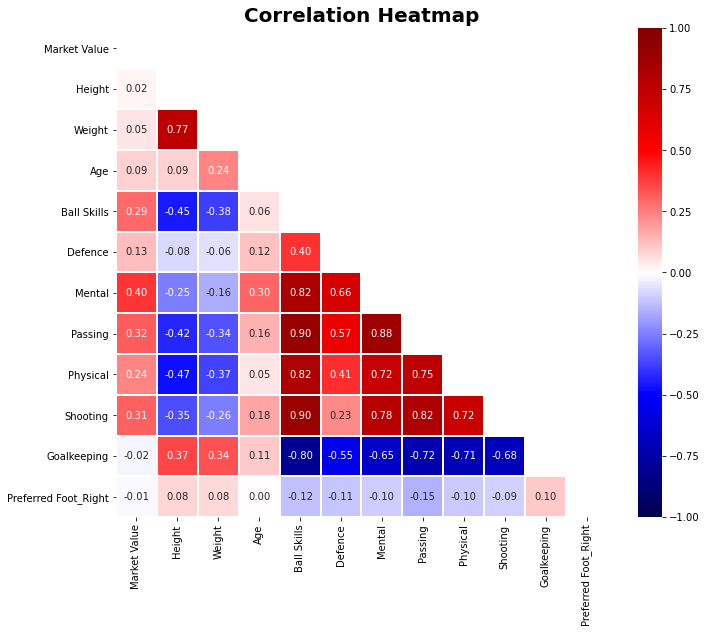

In [11]:
fig = plt.figure(figsize=[11,9])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
plt.savefig('heatmap1.png',transparent=True, bbox_inches='tight')

In [12]:
df = df.drop(['Height','Weight','Preferred Foot_Right'],axis=1)

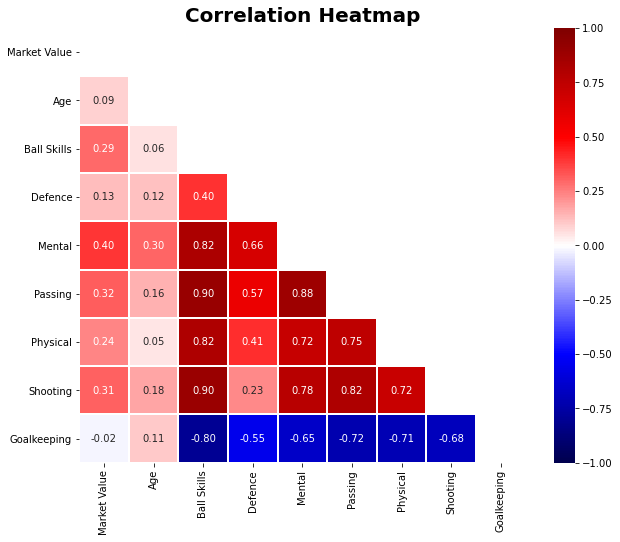

In [13]:
corr_matrix = df.corr()
fig = plt.figure(figsize=[10,8])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
plt.savefig('heatmap2.png',transparent=True, bbox_inches='tight')

C:\Users\tanpe\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:287: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  bp = ax.boxplot(values, **kwds)


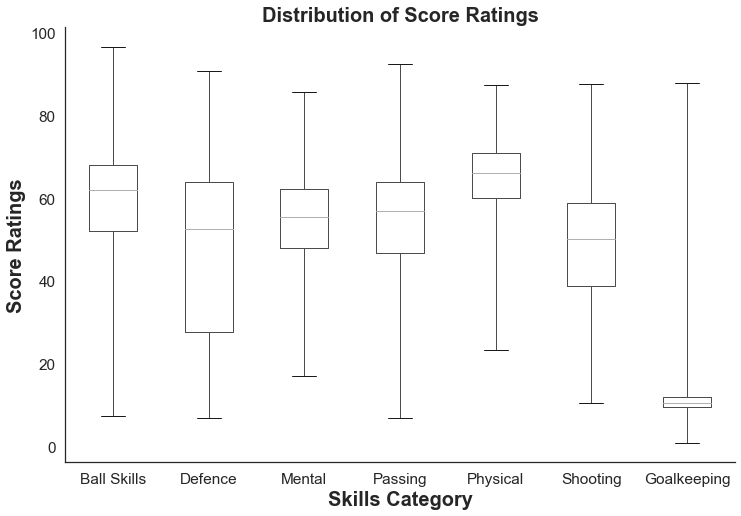

In [14]:
fig = plt.figure(figsize=[12,8])
sns.set(style = 'white', font_scale=1.4)
df[['Ball Skills','Defence','Mental','Passing','Physical','Shooting','Goalkeeping']].boxplot(whis='range')
plt.grid(False)
plt.xlabel('Skills Category',fontsize=20,weight='bold')
plt.ylabel('Score Ratings',fontsize=20,weight='bold')
plt.title('Distribution of Score Ratings',fontsize=20,weight='bold')
sns.despine()
plt.savefig('boxplot.png',transparent=True, bbox_inches='tight')


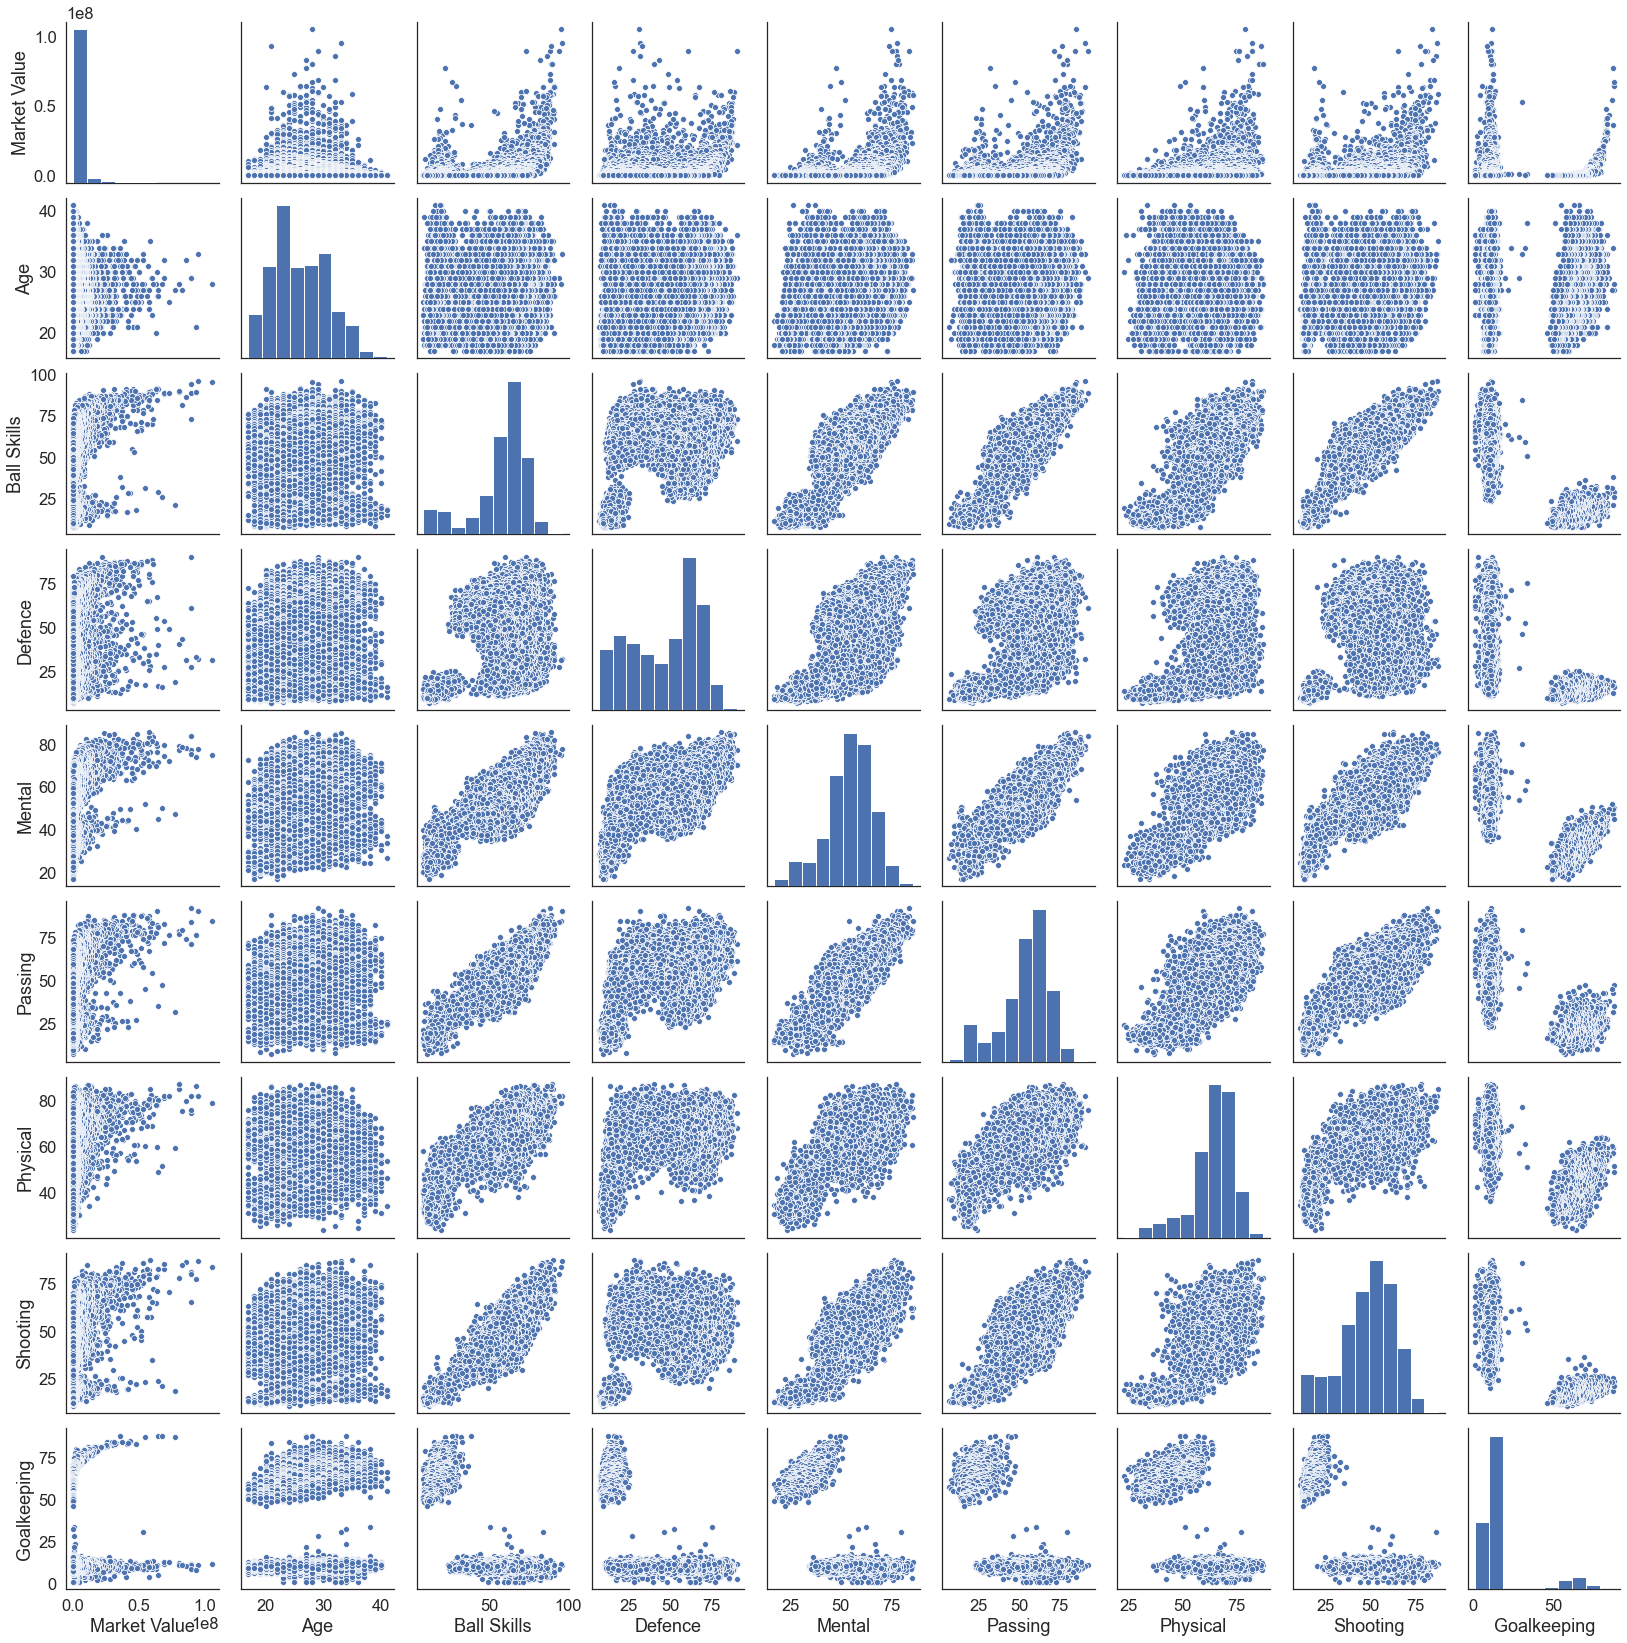

In [15]:
sns.set(style='white',font_scale=1.5)
sns.pairplot(df)
plt.savefig('pairplot1.png',transparent=True, bbox_inches='tight')

In [16]:
y, X = patsy.dmatrices("Q('Market Value') ~ Age + Q('Ball Skills') + Defence + Mental + Passing + Physical + Shooting + Goalkeeping", data=df, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Q('Market Value')   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     1114.
Date:                Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:44:30   Log-Likelihood:            -3.2471e+05
No. Observations:               19386   AIC:                         6.494e+05
Df Residuals:                   19377   BIC:                         6.495e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.777e+07   3.71e+05    -47.847      0.000   -1.85e+07    -1.7e+07
Age              -2.363e+05   8382.446    -28.185      0.000   -2.53e+05    -2.2e+05
Q('Ball Skills')  7.215e+04   7551.270      9.555      0.000    5.73e+04     8.7e+04
Defence           4081.6875   3711.427      1.100      0.271   -3193.031    1.14e+04
Mental             3.04e+05   9147.664     33.233      0.000    2.86e+05    3.22e+05
Passing          -3.266e+04   6695.631     -4.878      0.000   -4.58e+04   -1.95e+04
Physical          1.809e+04   5913.850      3.059      0.002    6496.054    2.97e+04
Shooting            5.4e+04   6409.178      8.425      0.000    4.14e+04    6.66e+04
Goalkeeping        2.16e+05   4318.103     50.028      0.000    2.08e+05    2.24e+05
==============================================================================
Omnibus:                    24748.425   Durbin-Watson:                   0.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5844833.308
Skew:                           6.993   Prob(JB):                         0.00
Kurtosis:                      86.907   Cond. No.                     1.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
df1 = df.copy()

In [18]:
df1['Market Value'] = np.log(df['Market Value'])

In [19]:
df1 = df1.rename(columns={'Market Value':'Log Market Value'})

In [20]:
df1 = df1.drop('Mental',axis=1)
df1 = df1.drop('Ball Skills',axis=1)

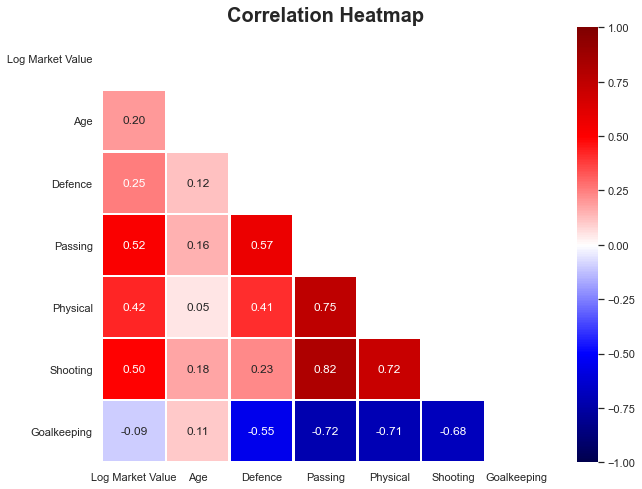

In [21]:
sns.set(font_scale=1,style='white')
corr_matrix = df1.corr()
fig = plt.figure(figsize=[10,8])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1.5,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
plt.savefig('heatmap3.png',transparent=True, bbox_inches='tight')

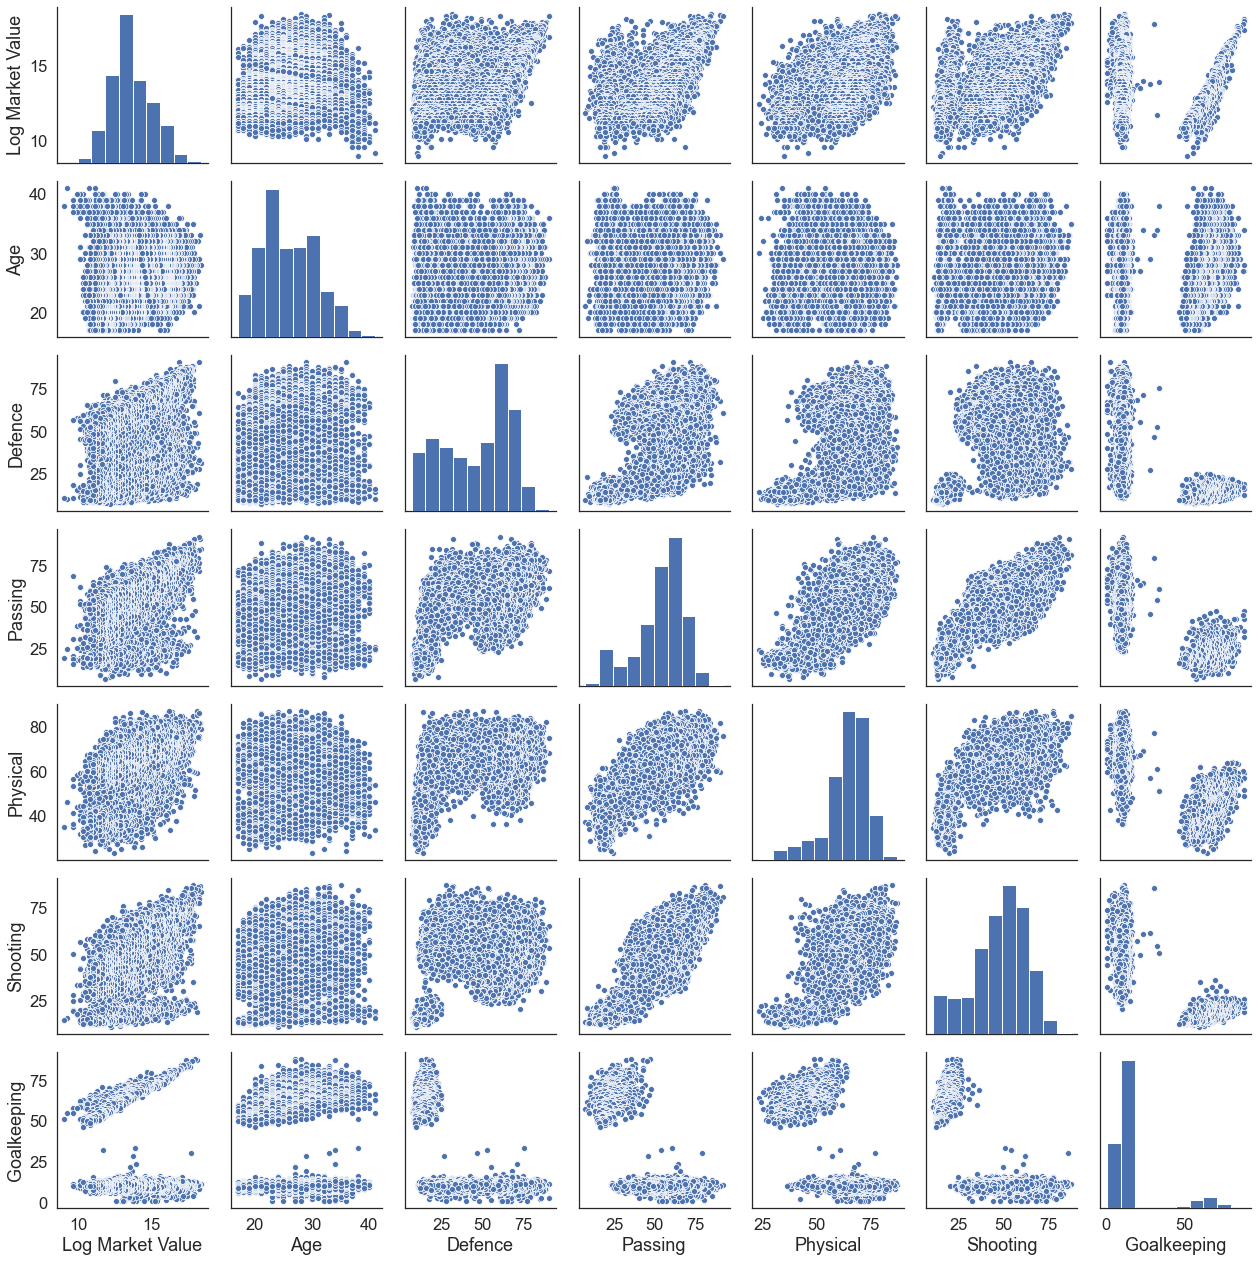

In [22]:
sns.set(style='white',font_scale=1.5)
sns.pairplot(df1)
plt.savefig('pairplot2.png',transparent=True, bbox_inches='tight')

In [23]:
y, X = patsy.dmatrices("Q('Log Market Value') ~ Age + Defence + Passing + Physical + Shooting + Goalkeeping", data=df1, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q('Log Market Value')   R-squared:                       0.583
Model:                               OLS   Adj. R-squared:                  0.583
Method:                    Least Squares   F-statistic:                     4523.
Date:                   Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                           14:44:49   Log-Likelihood:                -25368.
No. Observations:                  19386   AIC:                         5.075e+04
Df Residuals:                      19379   BIC:                         5.080e+04
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.1010      0.072     70.793      0.000       4.960       5.242
Age            -0.0412      0.002    -26.196      0.000      -0.044      -0.038
Defence         0.0284      0.001     55.178      0.000       0.027       0.029
Passing         0.0194      0.001     18.446      0.000       0.017       0.021
Physical        0.0402      0.001     37.201      0.000       0.038       0.042
Shooting        0.0691      0.001     68.165      0.000       0.067       0.071
Goalkeeping     0.0829      0.001    115.059      0.000       0.081       0.084
==============================================================================
Omnibus:                      440.831   Durbin-Watson:                   1.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.935
Skew:                           0.365   Prob(JB):                    7.40e-104
Kurtosis:                       3.237   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(pred,y,alpha=0.1)
    plt.plot(y, y, color='red',linewidth=1,)
    plt.title("Regression fit")
    plt.xlabel("Predicted y")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    print(res)    
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt,)
    plt.title("Normal Q-Q plot")

In [25]:
y = df1['Log Market Value']
X = df1.drop(['Player','Log Market Value'],axis=1)

0        1.768813
1        1.425493
2        2.039495
3        1.974358
4        2.122271
           ...   
19397   -0.578451
19398   -1.203829
19399   -0.814715
19400   -0.995620
19401   -0.121899
Name: Log Market Value, Length: 19386, dtype: float64


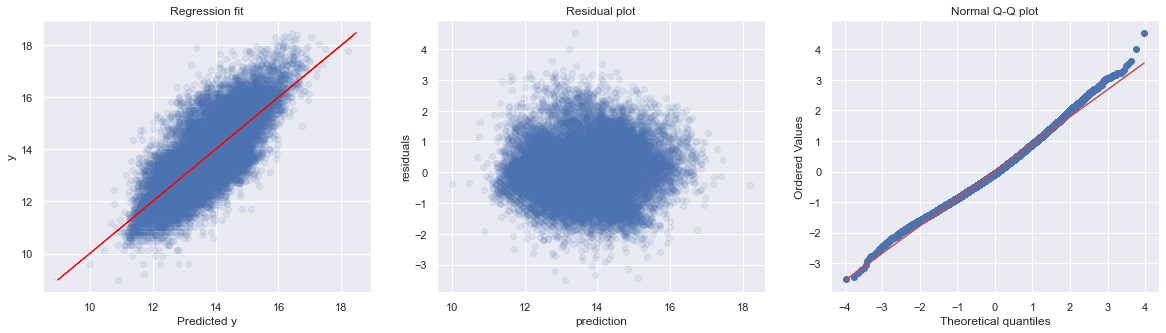

In [26]:
sns.set(style='darkgrid')
diagnostic_plot(X, y)

In [27]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [28]:
selected_columns = ['Age','Defence','Passing','Physical','Shooting','Goalkeeping']

In [29]:
lasso_model = Lasso(alpha = 0.1)    
lasso_model.fit(X_train_val[selected_columns], y_train_val)
list(zip(selected_columns, lasso_model.coef_))
## doing feature selection with Lasso

[('Age', -0.03256450686543371),
 ('Defence', 0.027131840608116624),
 ('Passing', 0.019373287385754497),
 ('Physical', 0.0391339894661407),
 ('Shooting', 0.06655454787927165),
 ('Goalkeeping', 0.07937171007918886)]

In [30]:
std = StandardScaler()
std.fit(X_train_val.values)
X_tr = std.transform(X_train_val.values)
X_te = std.transform(X_test.values)
## Scaling x values for lasso,ridge,elastic net

In [31]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

In [32]:
alphavec = 10**np.linspace(-15,4,400)
lasso_model = LassoCV(alphas = alphavec, cv=kf)
lasso_model.fit(X_tr, y_train_val)
lasso_model.alpha_
## finding alpha value that gives lowest MAE for Lasso CV

C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.248800842071432, tolerance: 2.4044392252554463
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.589502359685866, tolerance: 2.4044392252554463
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.246943062329592, tolerance: 2.4044392252554463
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

6.449466771037634e-14

In [33]:
alphavec = 10**np.linspace(-2,2,200)
ridge_model = RidgeCV(alphas = alphavec, cv=kf)
ridge_model.fit(X_tr, y_train_val)
ridge_model.alpha_
## finding alpha value that gives lowest MAE for Ridge CV

0.01

In [34]:
list(zip(X_train_val.columns, ridge_model.coef_))
# finding coefficients for optimum alpha value for Ridge

[('Age', -0.19186546429259463),
 ('Defence', 0.5881040945480208),
 ('Passing', 0.2773653498030474),
 ('Physical', 0.4072505995033036),
 ('Shooting', 1.0401782222145408),
 ('Goalkeeping', 1.4151388109865928)]

In [35]:
ridge_model_final = Ridge(alpha = 0.9329304026284686) 
Mean_R2_Ridge_CV = np.mean(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='r2'))
Mean_R2_Ridge_CV
# scoring the Ridge model based on CV

0.5878473861422584

In [36]:
Std_R2_Ridge_CV = np.std(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='r2'))
Std_R2_Ridge_CV

0.012128716302272531

In [37]:
Mean_MAE_Ridge_CV = -np.mean(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Mean_MAE_Ridge_CV
# scoring the Ridge model based on CV

0.7073122522888833

In [38]:
Std_MAE_Ridge_CV = np.std(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Std_MAE_Ridge_CV

0.011465339370715307

In [39]:
alphavec = 10**np.linspace(-22,-17,300)
elastic_model = ElasticNetCV(alphas = alphavec, cv=kf)
elastic_model.fit(X_tr, y_train_val)
elastic_model.alpha_
## finding alpha value that gives lowest MAE for ElasticNet CV

C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4399.891604122441, tolerance: 2.4044392252554463
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4643.836619413372, tolerance: 2.4044392252554463
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4568.293824588921, tolerance: 2.4044392252554463
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525:

C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4881.850104446424, tolerance: 2.4044392252554463
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4881.883476432421, tolerance: 2.4044392252554463
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4881.89744751734, tolerance: 2.4044392252554463
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: 

C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4821.22095453731, tolerance: 2.3806313878194967
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4805.184594597503, tolerance: 2.3806313878194967
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4809.962732197863, tolerance: 2.3806313878194967
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: 

C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4892.2924987469105, tolerance: 2.3806313878194967
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4892.292965483453, tolerance: 2.3806313878194967
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4892.297228233784, tolerance: 2.3806313878194967
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525

C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4955.4670663721345, tolerance: 2.3966492546617375
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4955.523057443501, tolerance: 2.3966492546617375
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4955.57693471677, tolerance: 2.3966492546617375
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525:

C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4837.766462307728, tolerance: 2.4009087146261447
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4875.253809052664, tolerance: 2.4009087146261447
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4879.021169455656, tolerance: 2.4009087146261447
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525:

C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4976.515743412499, tolerance: 2.4009087146261447
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 426.4564071027844, tolerance: 2.4009087146261447
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4976.517509267061, tolerance: 2.4009087146261447
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525:

C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4971.336874728067, tolerance: 2.413999743803689
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4973.733735002361, tolerance: 2.413999743803689
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4976.115476060685, tolerance: 2.413999743803689
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: Co

C:\Users\tanpe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6172.051181793767, tolerance: 2.9992174611212934
  model = cd_fast.enet_coordinate_descent(


2.350917875457294e-21

In [40]:
lm = LinearRegression()

Mean_R2_Linear_CV = np.mean(cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='r2'))
Mean_R2_Linear_CV 
# scoring the LR model based on CV


0.5878475608235643

In [41]:
Std_R2_Linear_CV = np.std(cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='r2'))
Std_R2_Linear_CV 

0.012129790381576216

In [42]:
Mean_MAE_Linear_CV = - np.mean(cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Mean_MAE_Linear_CV 


0.7073069784437764

In [43]:
Std_MAE_Linear_CV = np.std(cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Std_MAE_Linear_CV 

0.011462277812585077

In [44]:
X_train_val = X_train_val.reset_index().drop('index',axis=1)
y_train_val = y_train_val.reset_index().drop('index',axis=1)

In [45]:
err_vector = []

for degree in range(2,7):
    mae = []
    for train_index, test_index in kf.split(X_train_val):
        
        X_train1, X_test1 = X_train_val.loc[train_index], X_train_val.loc[test_index]
        y_train1, y_test1 = y_train_val.loc[train_index], y_train_val.loc[test_index]        
        
        poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        poly.fit(X_train1,y_train1)
        
        predict = poly.predict(X_test1)
        mae.append(mean_absolute_error(y_test1, predict))
    err_vector.append(np.mean(mae))
    print(degree)

2
3
4
5
6


In [46]:
err_vector


[0.43482512266074946,
 0.36767348239268116,
 0.3535292111622561,
 0.3469333955509689,
 0.3614810648117584]

In [47]:
poly = make_pipeline(PolynomialFeatures(4), LinearRegression())

Mean_R2_Poly_CV = np.mean(cross_val_score(poly, X_train_val, y_train_val, cv=kf, scoring='r2'))
Mean_R2_Poly_CV 

0.8903521284978494

In [48]:
Std_R2_Poly_CV = np.std(cross_val_score(poly, X_train_val, y_train_val, cv=kf, scoring='r2'))
Std_R2_Poly_CV

0.0013450006256154265

In [49]:
Mean_MAE_Poly_CV =  - np.mean(cross_val_score(poly, X_train_val, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Mean_MAE_Poly_CV 

0.3535292111622561

In [50]:
Std_MAE_Poly_CV = np.std(cross_val_score(poly, X_train_val, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Std_MAE_Poly_CV 

0.002002697412114814

In [51]:
print(f'Mean R2 Linear is: {Mean_R2_Linear_CV:.3f} +- {Std_R2_Linear_CV:.3f}')
print(f'Mean R2 Ridge is: {Mean_R2_Ridge_CV:.3f} +- {Std_R2_Ridge_CV:.3f}')
print(f'Mean R2 Poly is: {Mean_R2_Poly_CV:.3f} +- {Std_R2_Poly_CV:.3f}')

Mean R2 Linear is: 0.588 +- 0.012
Mean R2 Ridge is: 0.588 +- 0.012
Mean R2 Poly is: 0.890 +- 0.001


In [52]:
print(f'Mean MAE Linear is: {Mean_MAE_Linear_CV:.3f} +- {Std_MAE_Linear_CV:.3f}')
print(f'Mean MAE Ridge is: {Mean_MAE_Ridge_CV:.3f} +- {Std_MAE_Ridge_CV:.3f}')
print(f'Mean MAE Poly is: {Mean_MAE_Poly_CV:.3f} +- {Std_MAE_Poly_CV:.3f}')

Mean MAE Linear is: 0.707 +- 0.011
Mean MAE Ridge is: 0.707 +- 0.011
Mean MAE Poly is: 0.354 +- 0.002


In [53]:
poly = make_pipeline(PolynomialFeatures(4), LinearRegression())
poly.fit(X_train_val,y_train_val)
predicted = poly.predict(X_test)
print('R2 score on test set is: {}'.format(r2_score(y_test, predicted)))
print('MSE score on test set is: {}'.format(mean_absolute_error(y_test, predicted)))

R2 score on test set is: 0.8868254795065814
MSE score on test set is: 0.35219192474765193


In [54]:
def diagnostic_plot2(x_train, y_train, x_test, y_test):
    plt.figure(figsize=(22,8))
    
  #  poly = make_pipeline(PolynomialFeatures(4), LinearRegression())
  #  poly.fit(x_train,y_train)
  #  pred = poly.predict(x_test)
    
    rgr = LinearRegression()
    rgr.fit(x_train,y_train)
    pred = rgr.predict(x_test)    

    plt.subplot(1, 2, 1)
    plt.scatter(pred,y_test,alpha=0.1)
    plt.plot(y_test, y_test, color='red',linewidth=1,label='Identity Line (Log Market Value)')
    plt.title("Regression Fit on Test Set",weight='bold')
    plt.xlabel("Log Predicted Market Value")
    plt.ylabel("Log Market Value")
    plt.legend(loc='lower right')
    sns.despine()
    
    plt.subplot(1, 2, 2)
    res = np.array(y_test).reshape(-1,1) - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual Plot on Test Set",weight='bold')
    plt.xlabel("Log Predicted Market Value")
    plt.ylabel("Residuals")
    sns.despine()
    
 #   plt.subplot(1, 3, 3)
 #   #Generates a probability plot of sample data against the quantiles of a 
 #   # specified theoretical distribution 
 #   stats.probplot(res.T[0], dist="norm", plot=plt,)
 #   plt.title("Normal Q-Q plot")

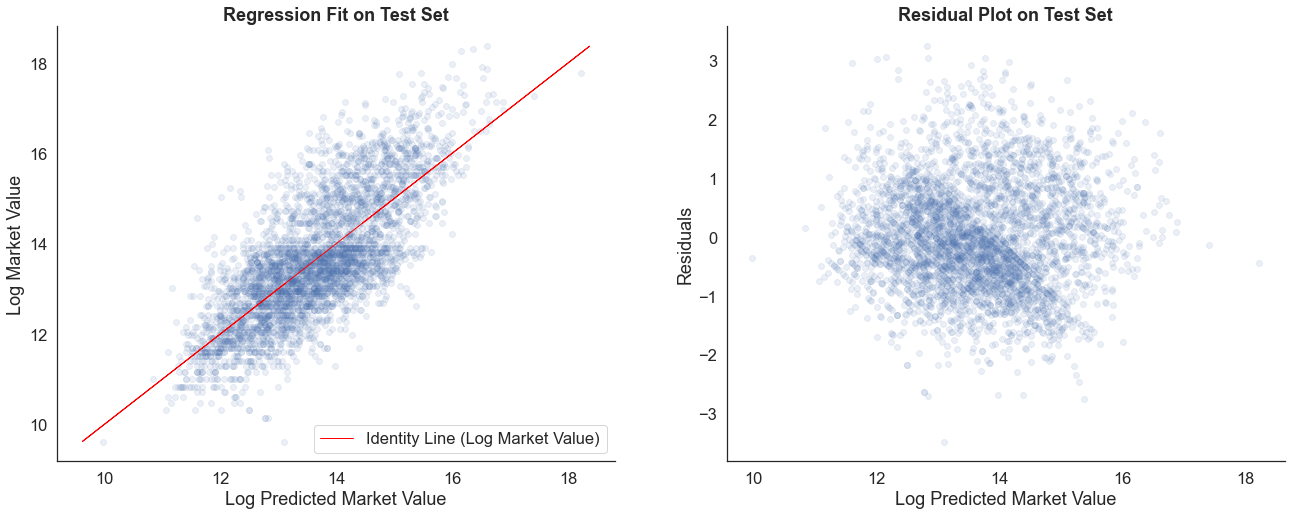

In [55]:
sns.set(style='white',font_scale=1.5)
diagnostic_plot2(X_train_val, y_train_val,X_test,y_test)
plt.savefig('regression1.png',transparent=True, bbox_inches='tight')

In [56]:
poly = make_pipeline(PolynomialFeatures(4), LinearRegression())
poly.fit(X_train_val,y_train_val)
predicted = poly.predict(X_test)
predicted

array([[13.86684298],
       [14.86446471],
       [14.12654847],
       ...,
       [13.30539014],
       [12.226185  ],
       [12.91099057]])

In [57]:
Test_Set = pd.DataFrame(y_test).join(X_test).join(pd.DataFrame(df1['Player']))
Test_Set['Log Market Value'] = np.exp(Test_Set['Log Market Value'] )
Test_Set = Test_Set.rename(columns={'Log Market Value':'Market Value'})
Test_Set['Predicted Market Value'] = np.exp(predicted)
Test_Set = Test_Set.sort_values(by='Predicted Market Value',ascending=False)
#Test_Set['Market Value'] = Test_Set['Market Value'].apply(lambda x : "{:,}".format(int(x)))
#Test_Set['Predicted Market Value'] = Test_Set['Predicted Market Value'].apply(lambda x : "{:,}".format(int(x)))
Test_Set = Test_Set[['Player','Market Value','Predicted Market Value','Age','Defence','Passing','Physical','Shooting','Goalkeeping']]
Test_Set.reset_index(inplace=True)
Test_Set.drop('index',axis=1,inplace=True)
Test_Set

Player  Market Value  Predicted Market Value  Age  \
0     Robert Lewandowski    86000000.0            1.122529e+08   32   
1        Virgil van Dijk    90000000.0            1.042331e+08   29   
2           Lionel Messi    95500000.0            9.119413e+07   33   
3             Paul Pogba    58000000.0            7.823228e+07   27   
4         Bernardo Silva    64000000.0            7.118480e+07   26   
...                  ...           ...                     ...  ...   
3873         Sam Russell       25000.0            3.251109e+04   37   
3874    Hüseyin Altıntaş       30000.0            3.098759e+04   25   
3875          Joe Murphy       30000.0            2.647249e+04   39   
3876          Joel Pinto       25000.0            2.567499e+04   40   
3877        Alan Bennett       15000.0            7.009464e+03   38   

        Defence    Passing   Physical  Shooting  Goalkeeping  
0     31.666667  74.333333  80.000000    86.250         10.2  
1     90.666667  71.666667  74.857143    65.125         11.6  
2     32.000000  90.666667  82.000000    86.875         10.8  
3     65.000000  85.333333  77.142857    82.000          4.0  
4     49.333333  82.333333  78.142857    71.375         10.8  
...         ...        ...        ...       ...          ...  
3873  25.000000  30.666667  42.428571    19.625         58.4  
3874   8.666667  16.333333  32.428571    14.000         50.4  
3875  18.000000  26.333333  41.857143    18.500         60.6  
3876  11.666667  26.000000  56.428571    17.375         60.4  
3877  56.666667  30.666667  36.285714    27.750         10.6  

[3878 rows x 9 columns]

In [58]:
mean_absolute_error(Test_Set['Market Value'],Test_Set['Predicted Market Value'])

837072.5054452859

In [59]:
r2_score(Test_Set['Market Value'],Test_Set['Predicted Market Value'])

0.8114669669520946

In [60]:
stats.kurtosis(Test_Set['Market Value']-Test_Set['Predicted Market Value'])

106.60096329278075

In [61]:
def diagnostic_plot3(x_train, y_train, x_test, y_test):
    plt.figure(figsize=(22,8))
    
    poly = make_pipeline(PolynomialFeatures(4), LinearRegression())
    poly.fit(x_train,y_train)
    pred = poly.predict(x_test)

    plt.subplot(1, 2, 1)
    plt.scatter(np.exp(pred),np.exp(y_test),alpha=0.1)
    plt.plot(np.exp(y_test), np.exp(y_test), color='red',linewidth=1,label='Identity Line (Market Value)')
    plt.title("Regression Fit on Test Set",weight='bold')
    plt.xlabel("Predicted Market Value")
    plt.ylabel("Market Value")
    plt.legend()
    sns.despine()
    
    plt.subplot(1, 2, 2)
    res = np.exp(np.array(y_test)).reshape(-1,1) - np.exp(pred)
    plt.scatter(np.exp(pred), res,alpha=0.1)
    plt.title("Residual Plot on Test Set",weight='bold')
    plt.xlabel("Predicted Market Value")
    plt.ylabel("Residuals")
    sns.despine()
    

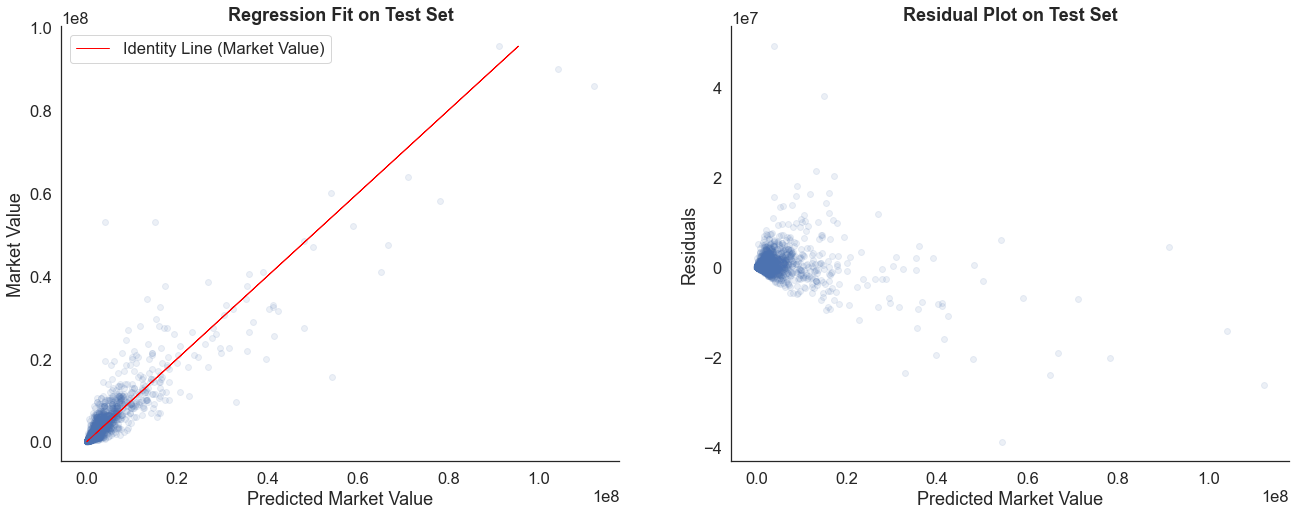

In [62]:
sns.set(style='white',font_scale=1.5)
diagnostic_plot3(X_train_val, y_train_val,X_test,y_test)
plt.savefig('regression2.png',transparent=True, bbox_inches='tight')

In [63]:
Test_Set['Market Value'] = Test_Set['Market Value'].apply(lambda x : "{:,}".format(int(x)))
Test_Set['Predicted Market Value'] = Test_Set['Predicted Market Value'].apply(lambda x : "{:,}".format(int(x)))
Test_Set[['Defence','Passing','Physical','Shooting','Goalkeeping']] = Test_Set[['Defence','Passing','Physical','Shooting','Goalkeeping']].apply(lambda x: round(x,1))
Test_Set = Test_Set.rename(columns={'Market Value':'Market Value (Euros)','Predicted Market Value': 'Predicted Market Value (Euros)'})
Test_Set

Player Market Value (Euros) Predicted Market Value (Euros)  \
0     Robert Lewandowski           86,000,000                    112,252,921   
1        Virgil van Dijk           89,999,999                    104,233,099   
2           Lionel Messi           95,499,999                     91,194,125   
3             Paul Pogba           57,999,999                     78,232,284   
4         Bernardo Silva           64,000,000                     71,184,798   
...                  ...                  ...                            ...   
3873         Sam Russell               25,000                         32,511   
3874    Hüseyin Altıntaş               30,000                         30,987   
3875          Joe Murphy               30,000                         26,472   
3876          Joel Pinto               25,000                         25,674   
3877        Alan Bennett               15,000                          7,009   

      Age  Defence  Passing  Physical  Shooting  Goalkeeping  
0      32     31.7     74.3      80.0      86.2         10.2  
1      29     90.7     71.7      74.9      65.1         11.6  
2      33     32.0     90.7      82.0      86.9         10.8  
3      27     65.0     85.3      77.1      82.0          4.0  
4      26     49.3     82.3      78.1      71.4         10.8  
...   ...      ...      ...       ...       ...          ...  
3873   37     25.0     30.7      42.4      19.6         58.4  
3874   25      8.7     16.3      32.4      14.0         50.4  
3875   39     18.0     26.3      41.9      18.5         60.6  
3876   40     11.7     26.0      56.4      17.4         60.4  
3877   38     56.7     30.7      36.3      27.8         10.6  

[3878 rows x 9 columns]